In [21]:
# /GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Betis.jpg

In [3]:
# Get size of the image
import struct
import imghdr

In [4]:
def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            return
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                return
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                return
        else:
            return
        return width, height

In [5]:
get_image_size("/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Betis.jpg")

(800, 600)

In [6]:
# Basic Example:

In [2]:
from sklearn.feature_extraction import image

In [3]:
import numpy as np

In [9]:
one_image = np.arange(16).reshape((4,4))

In [10]:
one_image

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [11]:
patches = image.extract_patches_2d(one_image, (2,2))

In [12]:
print (patches.shape)

(9, 2, 2)


In [13]:
patches[0]

array([[0, 1],
       [4, 5]])

In [14]:
patches[1]

array([[1, 2],
       [5, 6]])

In [15]:
patches[2]

array([[2, 3],
       [6, 7]])

In [16]:
patches[3]

array([[4, 5],
       [8, 9]])

In [17]:
patches[4]

array([[ 5,  6],
       [ 9, 10]])

In [18]:
patches[8]

array([[10, 11],
       [14, 15]])

In [19]:
# Image from pillow package 

In [4]:
from PIL import Image
import os

In [21]:
def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

In [5]:
im = Image.open("/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Betis.jpg")

In [23]:
imgwidth, imgheight = im.size

In [24]:
imgwidth, imgheight, im.size

(800, 600, (800, 600))

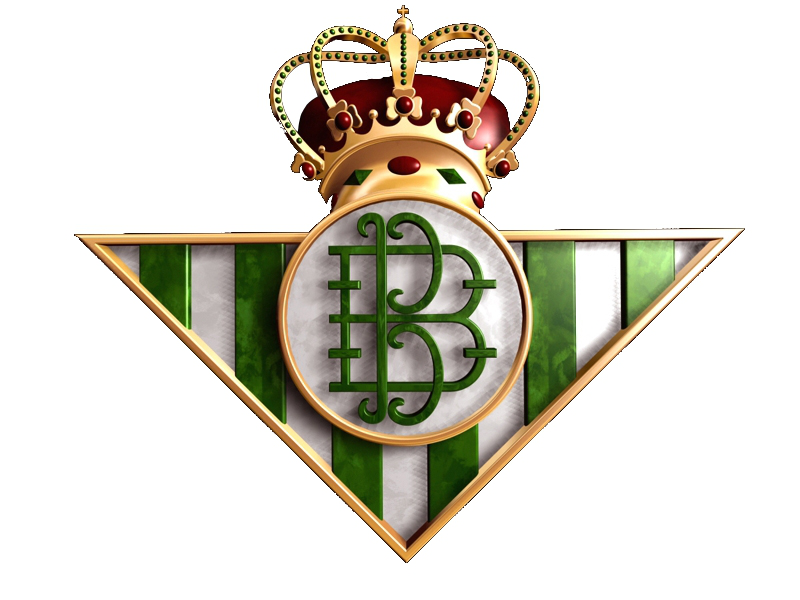

In [25]:
im

In [51]:
cropped_img = im.crop((500, 300, 600, 375))

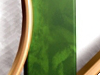

In [52]:
cropped_img

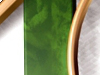

In [67]:
#Transpose
image_flip = cropped_img.transpose(Image.FLIP_LEFT_RIGHT)
image_flip = image_flip.transpose(Image.FLIP_TOP_BOTTOM)
image_flip

In [40]:
im = Image.open("/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Betis.jpg")
im = im.convert('RGBA')

In [47]:
# Code for test
path = "/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Images/"
height = 100
width = 100
for i in range(0,imgheight,height):
    for j in range (0, imgwidth, width):
        #print (i, j, i+height, j+width)
        box = (j, i, j+width, i+height)
        a = im.crop(box)
        a = a.convert('RGBA')
        fff = Image.new('RGBA', a.size, (255,)*4)
        a = Image.composite(a, fff, a)
        if a.convert("L").getextrema() not in ((0,0), (255,255)):
            a.save(os.path.join(path,"IMG-" + str(i)+"-"+str(j)+"-"+str(i+height)+"-"+str(j+width)+".PNG"))

In [69]:
# Code for train with rotation and transposition 
path = "/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Images/"
height = 100
width = 100
for i in range(0,imgheight,height):
    for j in range (0, imgwidth, width):
        #print (i, j, i+height, j+width)
        box = (j, i, j+width, i+height)
        a = im.crop(box)
        a = a.convert('RGBA')
        fff = Image.new('RGBA', a.size, (255,)*4)
        for k in range (0,360,45):
            a = a.rotate(k)
            a = Image.composite(a, fff, a)
            if a.convert("L").getextrema() not in ((0,0), (255,255)):
                a.save(os.path.join(path,"IMG-NT-Rotate" + str(k) + ": " + str(i)+"-"+str(j)+"-"+str(i+height)+"-"+str(j+width)+".PNG"))
                b = a.transpose(Image.FLIP_LEFT_RIGHT)
                b = b.transpose(Image.FLIP_TOP_BOTTOM)
                b.save(os.path.join(path,"IMG-T-Rotate" + str(k) + ": " + str(i)+"-"+str(j)+"-"+str(i+height)+"-"+str(j+width)+".PNG"))
                

In [29]:
#/GWD/appbase/projects/rd-scratchdata-stv/TSCI/CB/Juan_Pablo/Images/

In [30]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7F25253820F0>


In [31]:
#Rotation and flip
#image_rot_90 = image.rotate(90)
#image_rot_90.save('image_rot_90.jpg')
#image_rot_180 = image.rotate(180)
#image_rot_180.save('image_rot_180.jpg')

In [32]:
'''PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, PIL.Image.ROTATE_270 or PIL.Image.TRANSPOSE.

image = Image.open('unsplash_01.jpg')

image_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
image_flip.save('image_flip.jpg')'''

"PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, PIL.Image.ROTATE_270 or PIL.Image.TRANSPOSE.\n\nimage = Image.open('unsplash_01.jpg')\n\nimage_flip = image.transpose(Image.FLIP_LEFT_RIGHT)\nimage_flip.save('image_flip.jpg')"

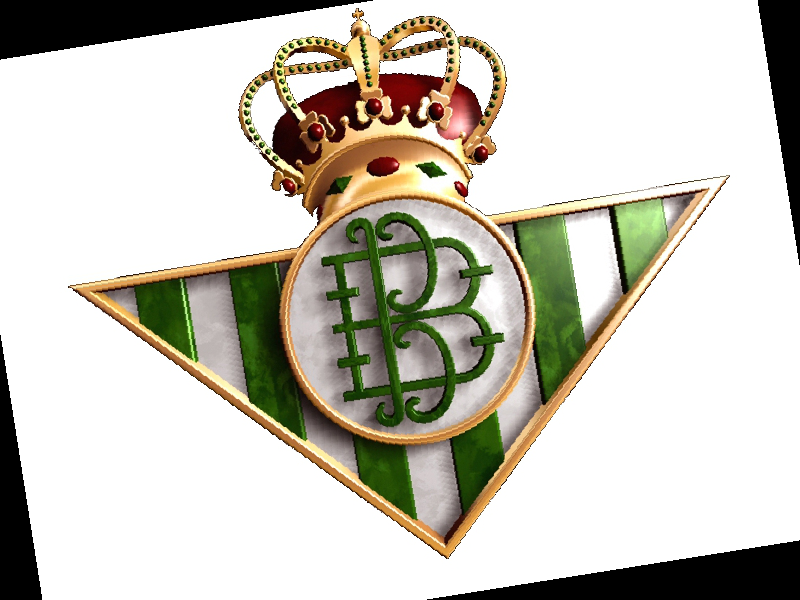

In [33]:
im.rotate(9)

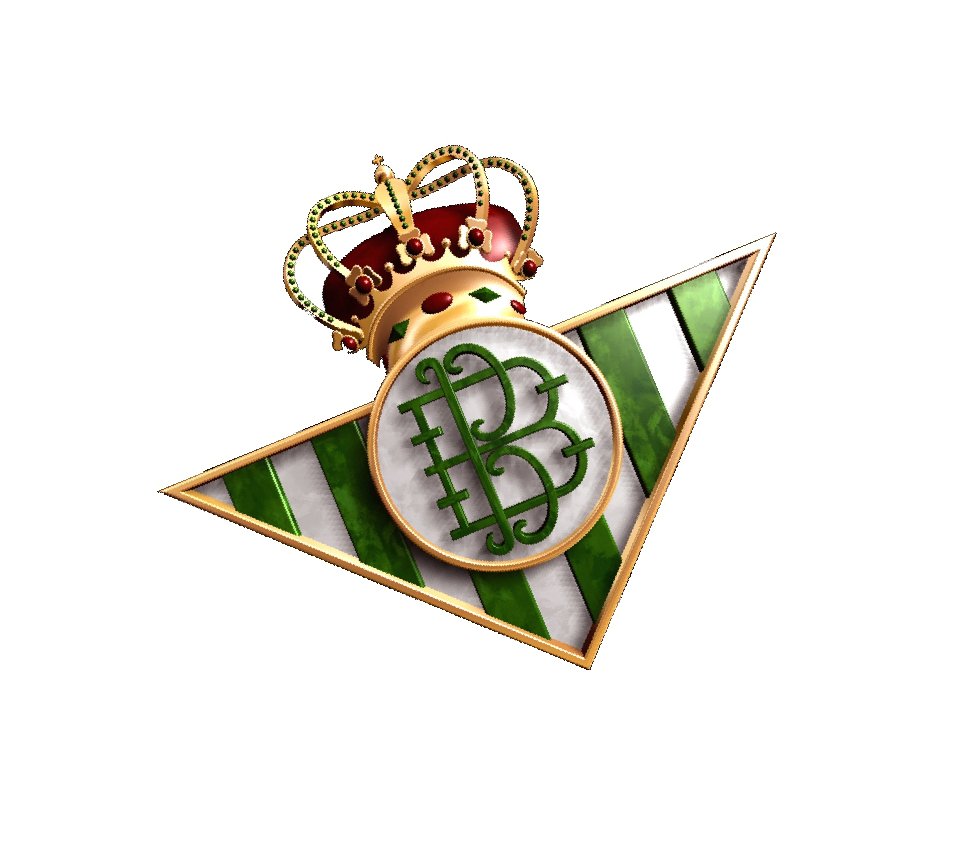

In [6]:
# converted to have an alpha layer
im2 = im.convert('RGBA')
# rotated image
rot = im2.rotate(22.2, expand=1)
# a white image same size as rotated image
fff = Image.new('RGBA', rot.size, (255,)*4)
# create a composite image using the alpha layer of rot as a mask
out = Image.composite(rot, fff, rot)
# save your work (converting back to mode='1' or whatever..)
out

# How to detect blank and black images

In [106]:
blank_image = Image.new('RGBA', (400, 300), 'white')

In [114]:
black_image = Image.new('RGBA', (400, 300), 'black')

In [115]:
blank_image.convert("L").getextrema()

(255, 255)

In [116]:
black_image.convert("L").getextrema()

(0, 0)

In [119]:
black_image.convert("L").getextrema()==(0, 0)

True

In [120]:
blank_image.convert("L").getextrema()==(255, 255)

True

In [121]:
3 not in [4, 5, 6]

True